In [1]:
import warnings
warnings.filterwarnings('ignore')
from pathlib import Path
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
# Import Clean CSV
TB_Rates = Path('Resources/TB_Rates_Cleaned.csv')
HDI = Path('Resources/HDI.csv')

# Create Data Frame
tb_rates_df = pd.read_csv(TB_Rates)
hdi_df = pd.read_csv(HDI)

In [3]:
# Drop Columns
tb_drop =   ['iso2',
            'iso3','iso_numeric',
            'g_whoregion',
            'e_inc_100k_lo',
            'e_inc_100k_hi',
            'cfr_lo',
            'cfr_hi',
            'cfr_pct_lo',
            'cfr_pct_hi',
            'c_cdr',
            'c_cdr_lo',
            'c_cdr_hi',
            'e_inc_num_lo',
            'e_inc_num_hi',
            'e_tbhiv_prct_lo',
            'e_tbhiv_prct_hi',
            'e_inc_tbhiv_100k_lo',
            'e_inc_tbhiv_100k_hi',
            'e_inc_tbhiv_num_lo',
            'e_inc_tbhiv_num_hi',
            'e_mort_exc_tbhiv_100k_lo',
            'e_mort_exc_tbhiv_100k_hi',
            'e_mort_tbhiv_100k_lo',
            'e_mort_tbhiv_100k_hi',
            'e_mort_tbhiv_num_lo',
            'e_mort_tbhiv_num_hi',
            'e_mort_100k_lo',
            'e_mort_100k_hi',
            'e_mort_num_lo',
            'e_mort_num_hi',
            'e_mort_exc_tbhiv_num_lo',
            'e_mort_exc_tbhiv_num_hi',
            ]
tb_rates_df.drop(tb_drop, inplace=True, axis=1)
tb_rates_df.columns


Index(['country', 'year', 'e_pop_num', 'e_inc_100k', 'e_inc_num',
       'e_tbhiv_prct', 'e_inc_tbhiv_100k', 'e_inc_tbhiv_num',
       'e_mort_exc_tbhiv_100k', 'e_mort_exc_tbhiv_num', 'e_mort_tbhiv_100k',
       'e_mort_tbhiv_num', 'e_mort_100k', 'e_mort_num', 'cfr', 'cfr_pct',
       'c_newinc_100k'],
      dtype='object')

In [4]:
#Rename Remaining columns
tb_rename = {'country':'Country', 
            'year':'Year', 
            'e_pop_num':'Population', 
            'e_inc_100k': 'Cases per Cap.(All)', 
            'e_inc_num': 'Cases',
            'e_tbhiv_prct': 'Cases - HIV & TB %', 
            'e_inc_tbhiv_100k': 'Cases -HIV & TB per Cap.', 
            'e_inc_tbhiv_num': 'Cases - HIV & TB',
            'e_mort_exc_tbhiv_100k': 'Mortality - TB (exclude HIV)per Cap', 
            'e_mort_exc_tbhiv_num': 'Mortality - TB (exclude HIV)', 
            'e_mort_tbhiv_100k': 'Mortality - HIV & TB incident per Cap.',
            'e_mort_tbhiv_num':'Mortality - HIV & TB', 
            'e_mort_100k':'Mortality - Per Cap', 
            'e_mort_num': 'Mortality', 
            'cfr':'Case Fatality Ratio', 
            'cfr_pct': 'Case Fatality Ratio %',
            'c_newinc_100k': 'Total New and Relapse Cases'}
tb_rates_df.rename(columns=tb_rename, inplace=True)
hdi_df.rename(columns={'Country_Name':'Country'}, inplace=True)


In [5]:
tb_rates_df

,Country,Year,Population,Cases per Cap.(All),Cases,Cases - HIV & TB %,Cases -HIV & TB per Cap.,Cases - HIV & TB,Mortality - TB (exclude HIV)per Cap,Mortality - TB (exclude HIV),Mortality - HIV & TB incident per Cap.,Mortality - HIV & TB,Mortality - Per Cap,Mortality,Case Fatality Ratio,Case Fatality Ratio %,Total New and Relapse Cases
0,Afghanistan,2000,19542982,190.0,37000,0.02,0.03,6.0,68.0,13000.0,0.17,33.0,68.0,13000.0,NaN,NaN,36.0
1,Afghanistan,2001,19688632,189.0,37000,0.01,0.03,6.0,63.0,12000.0,0.30,60.0,63.0,12000.0,NaN,NaN,51.0
2,Afghanistan,2002,21000256,189.0,40000,0.01,0.03,6.0,57.0,12000.0,0.27,57.0,57.0,12000.0,NaN,NaN,66.0
3,Afghanistan,2003,22645130,189.0,43000,0.01,0.03,6.0,58.0,13000.0,0.29,66.0,58.0,13000.0,NaN,NaN,61.0
4,Afghanistan,2004,23553551,189.0,44000,0.01,0.03,6.0,51.0,12000.0,0.29,67.0,52.0,12000.0,NaN,NaN,78.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4697,Zimbabwe,2017,14751101,221.0,33000,63.00,140.00,21000.0,8.3,1200.0,27.00,4000.0,35.0,5200.0,NaN,NaN,175.0
4698,Zimbabwe,2018,15052184,210.0,32000,62.00,130.00,20000.0,7.7,1200.0,24.00,3600.0,32.0,4800.0,NaN,NaN,167.0
4699,Zimbabwe,2019,15354608,199.0,31000,60.00,119.00,18000.0,11.0,1700.0,31.00,4800.0,43.0,6600.0,NaN,NaN,137.0
4700,Zimbabwe,2020,15669666,181.0,28000,61.00,108.00,17000.0,12.0,1800.0,30.00,4700.0,42.0,6600.0,NaN,NaN,100.0


In [6]:
# handle nas
tb_rates_df["Case Fatality Ratio"].fillna(0, inplace = True)
tb_rates_df["Case Fatality Ratio %"].fillna(0, inplace = True)
tb_rates_df.head()


,Country,Year,Population,Cases per Cap.(All),Cases,Cases - HIV & TB %,Cases -HIV & TB per Cap.,Cases - HIV & TB,Mortality - TB (exclude HIV)per Cap,Mortality - TB (exclude HIV),Mortality - HIV & TB incident per Cap.,Mortality - HIV & TB,Mortality - Per Cap,Mortality,Case Fatality Ratio,Case Fatality Ratio %,Total New and Relapse Cases
0,Afghanistan,2000,19542982,190.0,37000,0.02,0.03,6.0,68.0,13000.0,0.17,33.0,68.0,13000.0,0.0,0.0,36.0
1,Afghanistan,2001,19688632,189.0,37000,0.01,0.03,6.0,63.0,12000.0,0.30,60.0,63.0,12000.0,0.0,0.0,51.0
2,Afghanistan,2002,21000256,189.0,40000,0.01,0.03,6.0,57.0,12000.0,0.27,57.0,57.0,12000.0,0.0,0.0,66.0
3,Afghanistan,2003,22645130,189.0,43000,0.01,0.03,6.0,58.0,13000.0,0.29,66.0,58.0,13000.0,0.0,0.0,61.0
4,Afghanistan,2004,23553551,189.0,44000,0.01,0.03,6.0,51.0,12000.0,0.29,67.0,52.0,12000.0,0.0,0.0,78.0


In [7]:
#Merge dataframes
merged_df = pd.merge(tb_rates_df, hdi_df, how='inner', on='Country')

#Find HDI quartiles
merged_df.quantile([0.25,0.75])

#Created DF for countries with low HDI
low_hdi_df = merged_df.loc[merged_df['Human Development Index (HDI) (Value)'] < 0.60050].reset_index(drop=True)

#Create DF for Countries with high HDi
high_hdi_df = merged_df.loc[merged_df['Human Development Index (HDI) (Value)'] > 0.82375].reset_index(drop=True)

#create dataframe for china
china_df = merged_df.loc[merged_df['Country'] == 'China'].reset_index(drop=True)
china_df



,Country,Year,Population,Cases per Cap.(All),Cases,Cases - HIV & TB %,Cases -HIV & TB per Cap.,Cases - HIV & TB,Mortality - TB (exclude HIV)per Cap,Mortality - TB (exclude HIV),Mortality - HIV & TB incident per Cap.,Mortality - HIV & TB,Mortality - Per Cap,Mortality,Case Fatality Ratio,Case Fatality Ratio %,Total New and Relapse Cases,HDI rank,Human Development Index (HDI) (Value)
0,China,2000,1264099069,107.0,1360000,2.0,2.10,27000.0,8.7,110000.0,0.89,11000.0,9.6,122000.0,0.00,0.0,36.0,79,0.768
1,China,2001,1272739582,104.0,1320000,1.7,1.80,23000.0,8.0,102000.0,0.77,9800.0,8.8,112000.0,0.00,0.0,37.0,79,0.768
2,China,2002,1280926120,100.0,1290000,1.6,1.60,20000.0,7.3,94000.0,0.72,9200.0,8.1,103000.0,0.00,0.0,36.0,79,0.768
3,China,2003,1288873367,97.0,1250000,1.5,1.50,19000.0,6.7,87000.0,0.58,7500.0,7.3,94000.0,0.00,0.0,48.0,79,0.768
4,China,2004,1296816711,94.0,1220000,1.5,1.40,18000.0,5.4,70000.0,0.44,5700.0,5.8,76000.0,0.00,0.0,62.0,79,0.768
5,China,2005,1304887562,91.0,1180000,1.6,1.50,19000.0,5.5,72000.0,0.37,4800.0,5.9,76000.0,0.00,0.0,69.0,79,0.768
6,China,2006,1313086567,88.0,1150000,1.8,1.50,20000.0,5.1,67000.0,0.37,4800.0,5.5,72000.0,0.00,0.0,72.0,79,0.768
7,China,2007,1321513224,85.0,1120000,1.9,1.60,21000.0,4.6,61000.0,0.32,4200.0,4.9,65000.0,0.00,0.0,74.0,79,0.768
8,China,2008,1330167148,82.0,1100000,1.9,1.60,21000.0,4.2,55000.0,0.30,3900.0,4.4,59000.0,0.00,0.0,73.0,79,0.768
9,China,2009,1339125595,81.0,1080000,1.9,1.60,21000.0,4.1,54000.0,0.29,3900.0,4.3,58000.0,0.00,0.0,72.0,79,0.768


In [21]:
#Group DF by year
by_year_df = tb_rates_df.groupby(by="Year").mean()
by_year_df.reset_index()

low_by_year_df = low_hdi_df.groupby(by="Year").mean()
low_by_year_df.reset_index()

high_by_year_df = high_hdi_df.groupby(by="Year").mean()
high_by_year_df.reset_index()

#reset index
by_year_df = by_year_df.reset_index()
by_year_df

low_by_year_df = low_by_year_df.reset_index()
by_year_df

high_by_year_df = high_by_year_df.reset_index()
by_year_df

by_year_df["Mortality Rate"] = (by_year_df['Mortality - TB (exclude HIV)'] / by_year_df['Cases'])
by_year_df["Mortality Rate - HIV"] = (by_year_df['Mortality - HIV & TB'] / by_year_df['Cases - HIV & TB'])
by_year_df



,Year,Population,Cases per Cap.(All),Cases,Cases - HIV & TB %,Cases -HIV & TB per Cap.,Cases - HIV & TB,Mortality - TB (exclude HIV)per Cap,Mortality - TB (exclude HIV),Mortality - HIV & TB incident per Cap.,Mortality - HIV & TB,Mortality - Per Cap,Mortality,Case Fatality Ratio,Case Fatality Ratio %,Total New and Relapse Cases,Mortality Rate,Mortality Rate - HIV
0,2000,2.901080e+07,139.450711,53252.180095,17.752470,57.928855,10753.216867,18.191095,8140.766667,17.309952,3244.404762,35.521381,11382.971429,0.000000,0.000000,71.355051,0.152872,0.301715
1,2001,2.939774e+07,139.953791,53990.374408,16.278675,55.710361,10082.987952,18.380476,8106.709524,17.031095,3151.714286,35.371810,11252.319048,0.000000,0.000000,71.617085,0.150151,0.312577
2,2002,2.964764e+07,142.831132,54445.023585,15.100359,53.716467,9570.880240,18.641801,8052.265403,15.921232,2951.492891,34.543128,10998.075829,0.000000,0.000000,76.277767,0.147897,0.308383
3,2003,3.003133e+07,144.697689,55134.910377,13.985930,52.185291,9162.709302,18.341374,7929.459716,15.770095,2930.582938,34.123886,10841.928910,0.000000,0.000000,82.951471,0.143819,0.319838
4,2004,3.041683e+07,143.645991,55486.589623,13.673931,51.147399,9051.306358,17.747109,7646.848341,15.590900,2867.649289,33.335498,10527.265403,0.000000,0.000000,80.940597,0.137814,0.316822
5,2005,3.066049e+07,142.609014,55484.943662,13.461955,50.233352,8992.698324,17.304245,7513.108491,16.085472,3060.292453,33.384481,10559.108491,0.000000,0.000000,82.562950,0.135408,0.340309
6,2006,3.105080e+07,141.048028,55493.600939,13.526011,50.016940,9068.311475,16.313066,7271.410377,16.269434,3126.665094,32.609764,10377.570755,0.000000,0.000000,81.420098,0.131032,0.344790
7,2007,3.144717e+07,138.315962,55300.483568,12.765055,47.170824,8703.604396,16.053915,7177.896226,15.784292,3049.632075,31.889481,10216.750000,0.000000,0.000000,81.437005,0.129798,0.350387
8,2008,3.184885e+07,135.736620,55073.502347,13.112350,45.395464,8754.852459,15.358679,7011.141509,15.269906,2901.358491,30.637311,9902.825472,0.000000,0.000000,82.214000,0.127305,0.331400
9,2009,3.225557e+07,134.135869,54917.544601,13.325895,43.895895,8393.100000,14.835377,6858.938679,14.077217,2800.226415,28.879009,9649.089623,0.000000,0.000000,82.689853,0.124895,0.333634


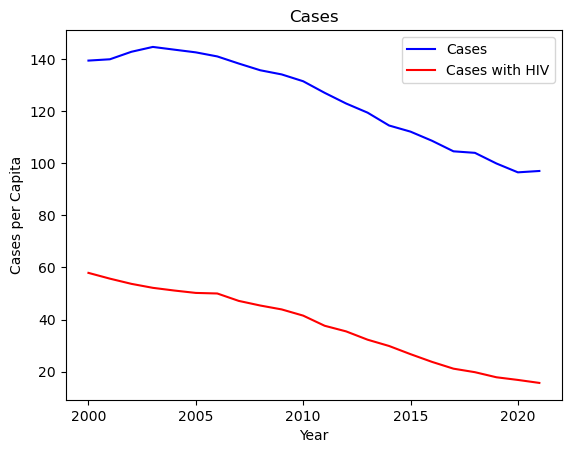

In [ ]:
#Plot Cases per Capita by year with and without HI
cases, = plt.plot(by_year_df['Year'], by_year_df["Cases per Cap.(All)"], color="blue", label="Cases" )
hiv, = plt.plot(by_year_df['Year'], by_year_df['Cases -HIV & TB per Cap.'], color="red", label="Cases with HIV" )
plt.legend(handles=[cases, hiv], loc="best")
plt.title("Cases")
plt.xlabel("Year")
plt.ylabel("Cases per Capita")
plt.show()

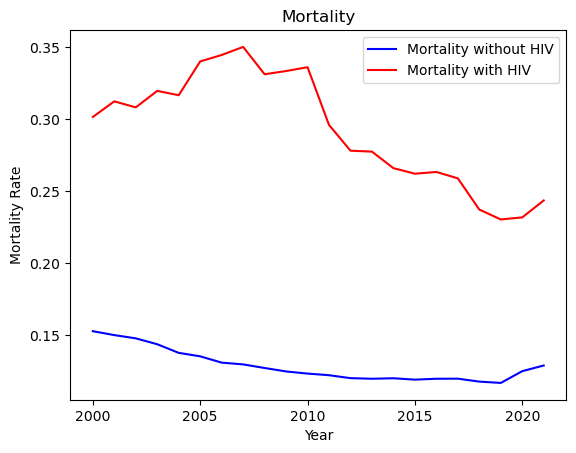

In [23]:
#Plot mortality by year with and without HIV
mortality, = plt.plot(by_year_df['Year'], by_year_df["Mortality Rate"], color="blue", label="Mortality without HIV" )
hiv_mortality, = plt.plot(by_year_df['Year'], by_year_df['Mortality Rate - HIV'], color="red", label="Mortality with HIV" )
plt.legend(handles=[mortality, hiv_mortality], loc="best")
plt.title("Mortality")
plt.xlabel("Year")
plt.ylabel("Mortality Rate")
plt.show()

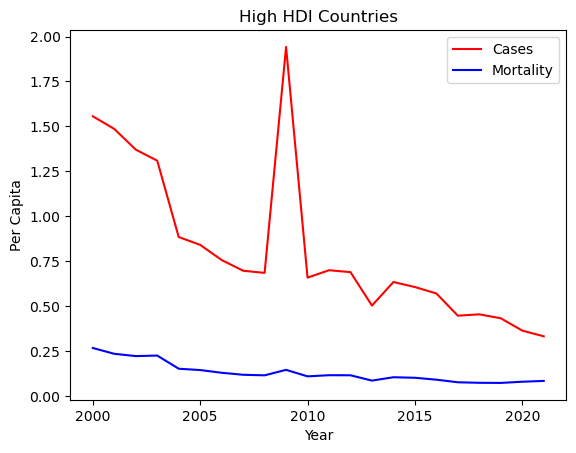

In [29]:
# Plot cases with HIV & TB by year for High and Low HDI countries
high, = plt.plot(high_by_year_df['Year'], high_by_year_df['Cases -HIV & TB per Cap.'], color="red", label='Cases')
high_cases, = plt.plot(high_by_year_df['Year'], high_by_year_df['Mortality - HIV & TB incident per Cap.'], color="blue", label='Mortality')
plt.legend(handles=[high, high_cases], loc="best")
plt.title("High HDI Countries")
plt.xlabel("Year")
plt.ylabel("Per Capita")
plt.show()

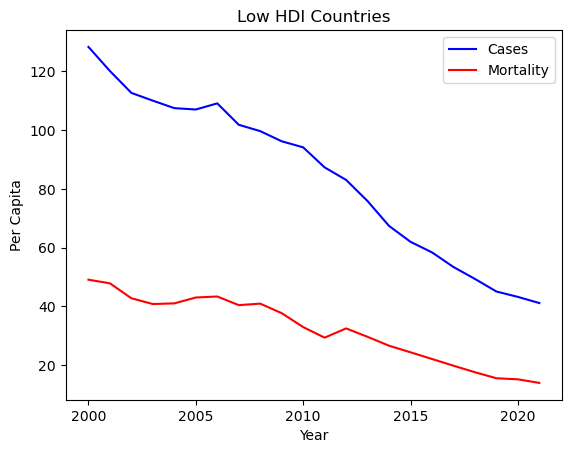

In [33]:
# Plot mortality with HIV & TB by year for High and Low HDI countries
low_cases, = plt.plot(low_by_year_df['Year'], low_by_year_df['Mortality - HIV & TB incident per Cap.'], color="red", label='Mortality')
low, = plt.plot(low_by_year_df['Year'], low_by_year_df['Cases -HIV & TB per Cap.'], color="blue", label='Cases')
plt.legend(handles=[low, low_cases], loc="best")
plt.title("Low HDI Countries")
plt.xlabel("Year")
plt.ylabel("Per Capita")
plt.show()